# Image Zooming and Shrinking

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
class Zoom:
    def zoomin(self, image_np):
        image_new = np.zeros(shape = (image_np.shape[0]*2,image_np.shape[1]*2), dtype ='uint8')
        for i in range(image_np.shape[0]):
            for j in range(image_np.shape[1]):
                image_new[2*i,2*j] = int(image_np[i,j])
        
        # horizontal scalling
        for i in range(0,image_new.shape[0],2):
            for j in range(1,image_new.shape[1],2):
                if j >= 1 and j < image_new.shape[1]-1:
                    image_new[i,j] = (int(image_new[i,j-1]) + int(image_new[i,j+1])) // 2
                # if j == 1:
                #     image_new[i,j] = (image_new[i,j+1]) // 2
                if j == image_new.shape[1]-1:
                    image_new[i,j] = int(image_new[i,j-1]) // 2
        
        # vertical scalling
        for i in range(1,image_new.shape[0],2):
            for j in range(image_new.shape[1]):
                if i > 0 and i < image_new.shape[0] - 1:
                    image_new[i,j] = (int(image_new[i-1,j]) + int(image_new[i+1,j]))//2
                if i == 0:
                    image_new[i,j] = int(image_new[i+1,j]) // 2
                if i == image_new.shape[0]-1:
                    image_new[i,j] = int(image_new[i-1,j]) // 2
        
        return image_new

    def zoomout(self, image_np):
        new_image = np.zeros(shape = (image_np.shape[0] // 2,image_np.shape[1] // 2), dtype = 'uint8')
        for i in range(0,image_np.shape[0],2):
            for j in range(0,image_np.shape[1],2):
                new_image[i//2,j//2] = image_np[i,j]
        return new_image

In [3]:
image = input('enter the image :')
image_np = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
z = Zoom()
new_image = z.zoomin(image_np.copy())
new_image2 = z.zoomout(image_np.copy())

enter the image :blastoise.png


In [7]:
# print('new image', new_image)
# print('orignal image', image_np) print(new_image)

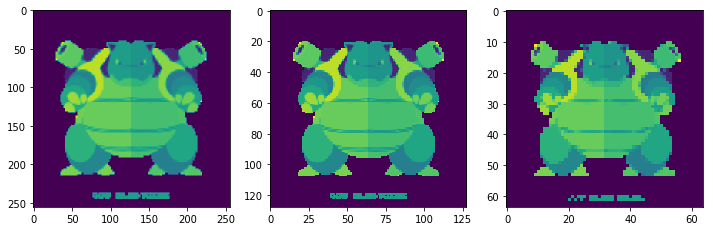

In [11]:
cv2.imshow('zoomed image',new_image)
cv2.imshow('orignal image',image_np)
cv2.imshow('shrinked Image', new_image2)

cv2.waitKey(0)
cv2.destroyAllWindows()

_,ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(new_image)
# plt.show()
ax[1].imshow(image_np)
# plt.show()
ax[2].imshow(new_image2)
# plt.show()